In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mlxtend.plotting import plot_decision_regions

# Bagging and Pasting

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

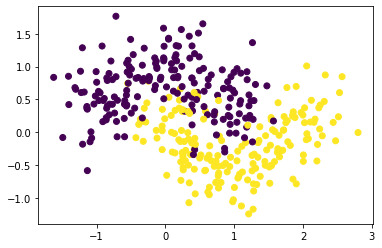

In [3]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

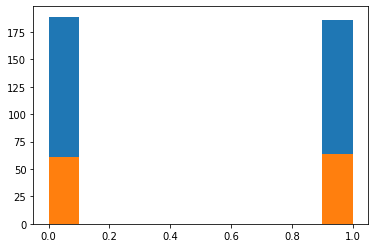

In [4]:
plt.hist(y_train)
plt.hist(y_test)
plt.show()

* Scikit-Learn oferuje prosty interfejs API do **bagging** i **pasting** . 

* Poniższy kod uczy zespół złożony z 500 drzewa decyzyjnego, z które zostało nauczonych na 100 elementach ze zbioru uczącego losowo pobranych z zestawu treningowego ze zwracaniem 

* Jest to przykład **bagging**, ale jeśli chcesz użyć **pasting** zamiast tego, po prostu ustaw **bootstrap=False**. 

* Parametr **n_jobs** mówi Scikit-Learn ile rdzeni procesora można użyć do treningu i prognoz (-1 mówi Scikit-Learn, aby używać wszystkich dostępnych rdzeni):

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

The BaggingClassifier automatycznie wykonuje miękkie głosowanie zamiast twardego, jeśli klasyfikator bazowy może oszacować prawdopodobieństwa klasy (tj. jeśli ma metodę **predict_proba()**), co ma miejsce w przypadku klasyfikatorów Decision Trees.

In [6]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


In [7]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


# Zad. 

Narysuj wynik dla

* BaggingClassifier
* DecisionTreeClassifier

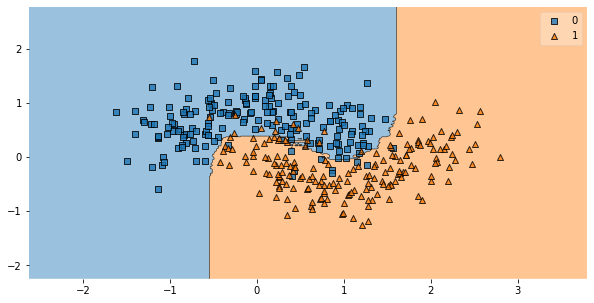

In [8]:
plt.figure(figsize=(10, 5))
plot_decision_regions(X_train, y_train, bag_clf)
plt.show()

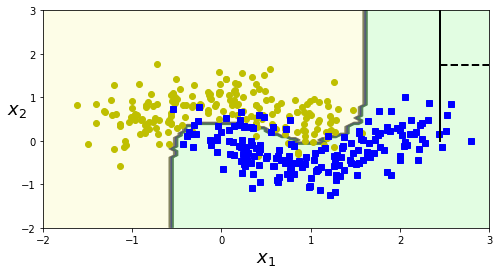

In [10]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-2, 3, -2, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(bag_clf, X_train, y_train, iris=False)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
# plt.text(1.40, 1.0, "Depth=0", fontsize=15)
# plt.text(3.2, 1.80, "Depth=1", fontsize=13)
# plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

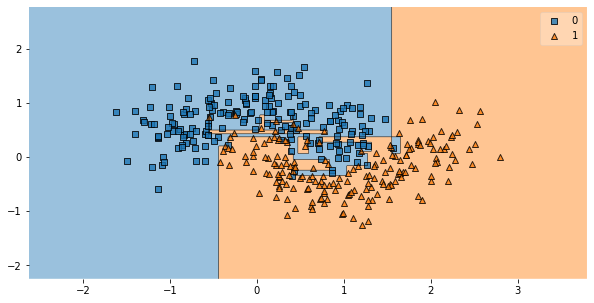

In [9]:
plt.figure(figsize=(10, 5))
plot_decision_regions(X_train, y_train, tree_clf)
plt.show()

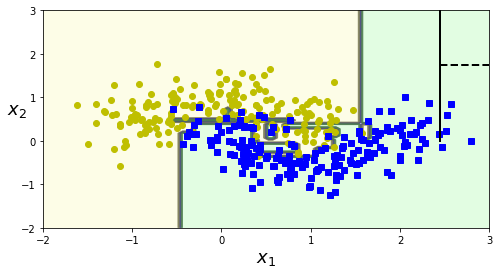

In [11]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-2, 3, -2, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X_train, y_train, iris=False)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
# plt.text(1.40, 1.0, "Depth=0", fontsize=15)
# plt.text(3.2, 1.80, "Depth=1", fontsize=13)
# plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

# Out-of-Bag Evaluation

* W przypadku metody **bagging** niektóre przykłady mogą być próbkowane kilka razy dla dowolnego predyktora  podczas gdy inne mogą nie być próbkowane w ogóle. 

* Domyślnie BaggingClassifier pobiera próbki ze zwracaniem (**bootstrap = True**), gdzie $m$ jest rozmiarem zestawu treningowego. 

* Oznacza to, że tylko około 63% instancji szkoleniowych jest próbkowanych średnio dla każdego z predyktorów. 

* Pozostałe 37% instancji szkoleniowych, które nie są próbkowane, nazywane są instancjami **out-of-bag (oob)**. 

* Zauważ, że nie są one takie same dla wszystkich predyktorów. 

* Ponieważ predykator nigdy nie widzi instancji **out-of-bag (oob)** podczas treningu, klasyfikator może być oceniany na tych instancjach. 

* Możesz ocenić komitet klasyfikatorów uśredniając oceny każdego z predyktorów na **out-of-bag (oob)**. 

In [23]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), 
    n_estimators=500,
    bootstrap=True, 
    n_jobs=-1, 
    oob_score=True)

bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.904

In [24]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.904